In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import OneHotEncoder
#from sklearn.preprocessing import MinMaxScaler
#from sklearn.feature_selection import RFE
#from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

In [43]:
#now for a ML lab:
#the task is to input the house features and output the price of the house.

#1. load the data
housing = pd.read_csv('housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [44]:
#2. get to know the data:
print(housing.info())

print("_"*100)

#we realize that the total_bedrooms has some missing values, also the type of ocean_proximity is object.
print(housing["ocean_proximity"].value_counts())

#now for the total_bedrooms, we have 3 options:
#1. get rid of the corresponding districts
#2. get rid of the whole attribute
#3. set the values to some value (zero, the mean, the median, etc.)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None
____________________________________________________________________________________________________
ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


In [45]:
print(housing.describe())
#we realize that the range of values is different for all the features.
#We need to scale the data before feeding it to the model.
#but to visualizing the data first for now:

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

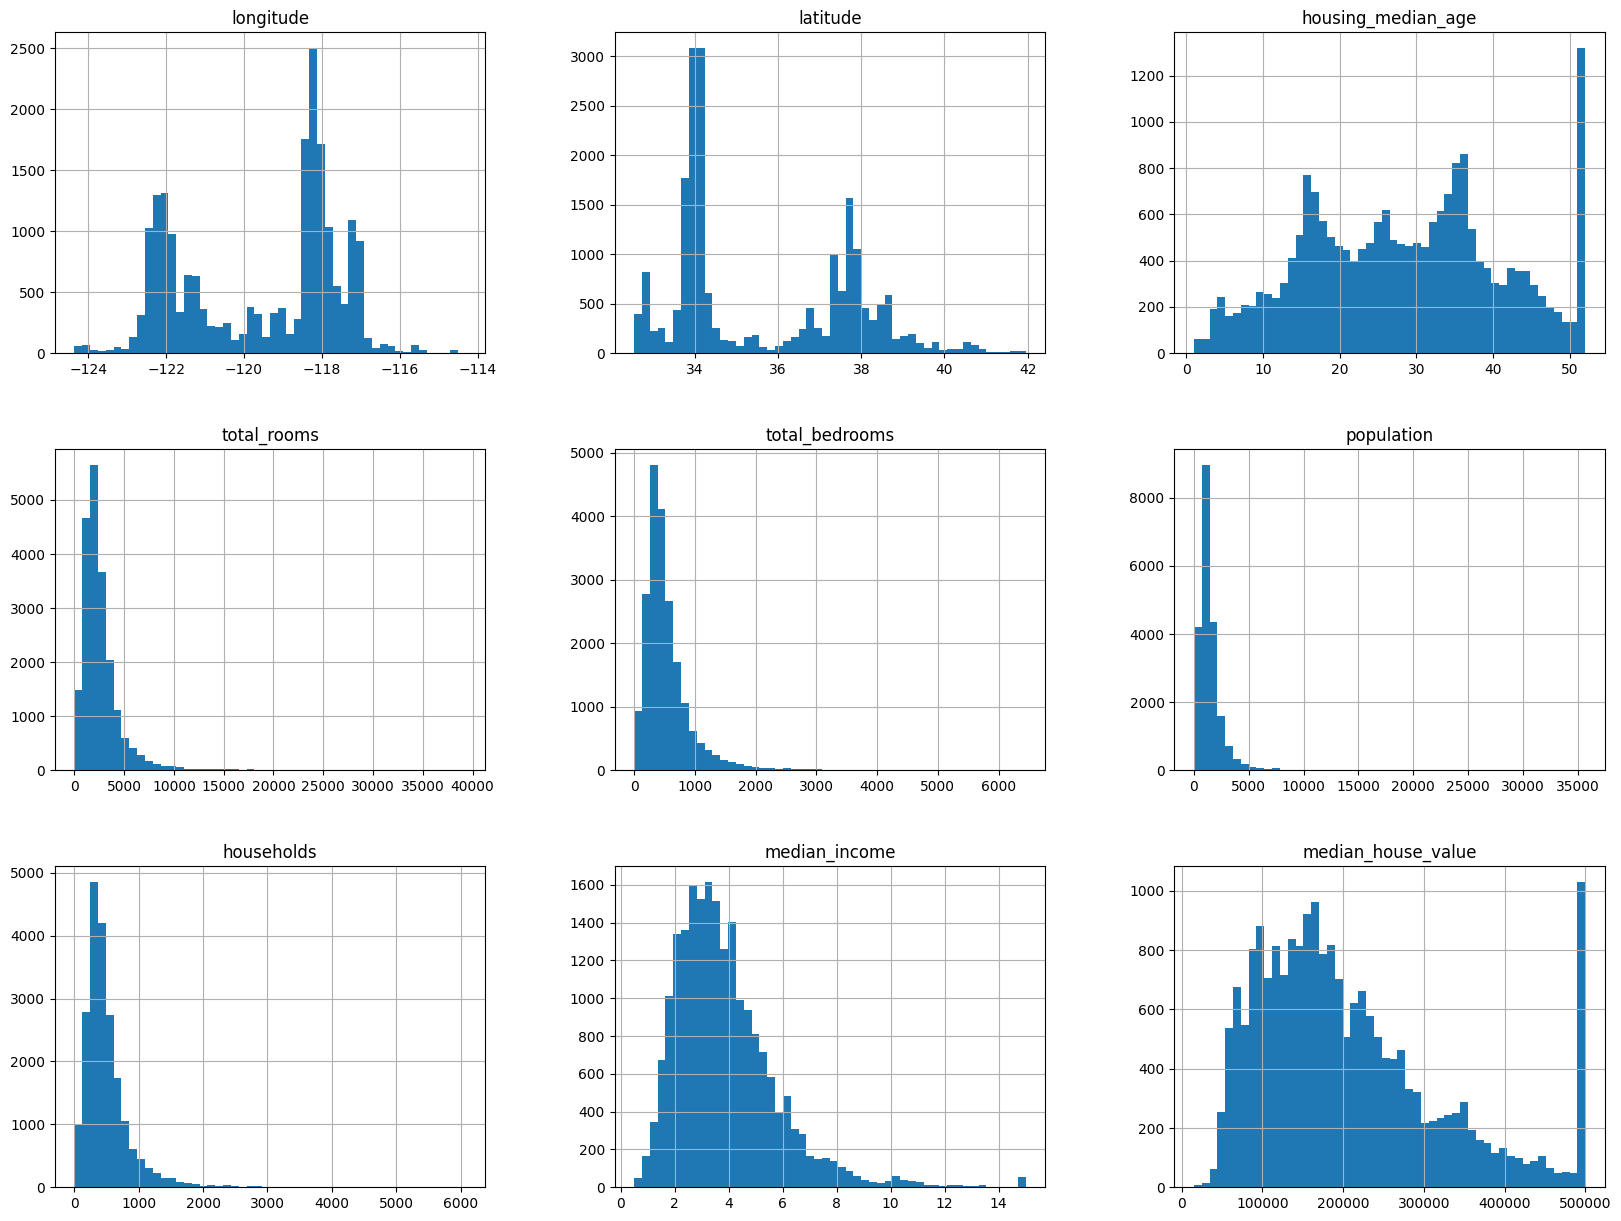

In [46]:
housing.hist(bins=50 , figsize=(20,15))
plt.show()

#notice that the ocean_proximity is a categorical attribute, so it is not shown in the histogram.
#for the housing_median_age and the median_house_value, they are capped (it has been thresholded).


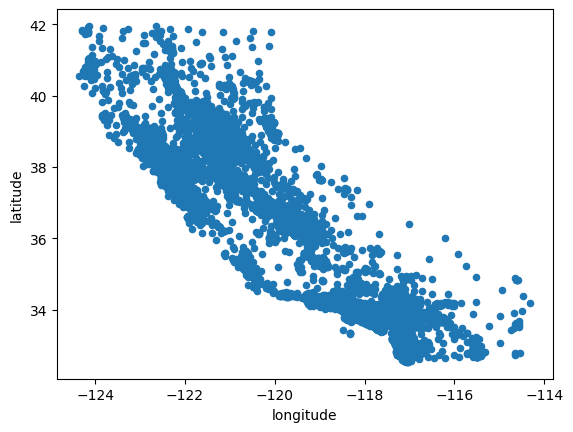

In [47]:
housing.plot(kind = "scatter" , x="longitude", y="latitude")
plt.show()

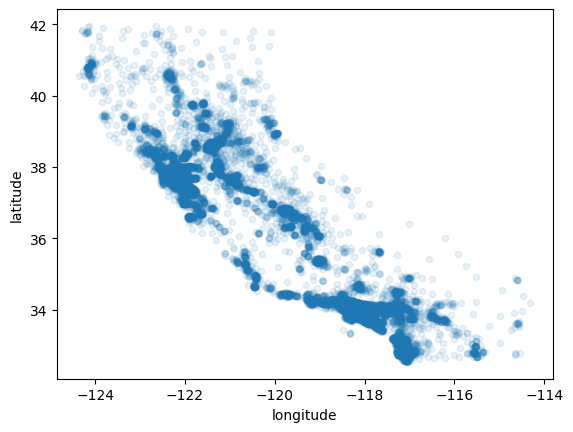

In [48]:
housing.plot(kind = "scatter" , x="longitude", y="latitude" , alpha = 0.1)      #the alpha option makes it easier to visualize the places where there is a high density of data points (where the data was taken the most).
plt.show()


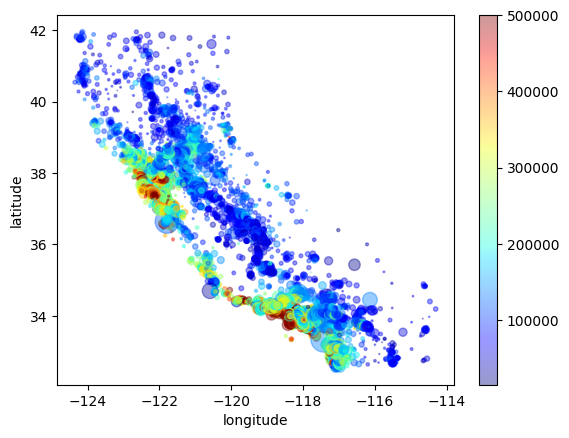

In [49]:
housing.plot(kind = "scatter" , x="longitude", y="latitude" , alpha = 0.4 , s=housing['population']/100 , c = housing["median_house_value"] , cmap = plt.get_cmap("jet") , colorbar = True)
plt.show()
#this shows the density of the population and the housing prices at the same time.
#we notice that the housies neare to the ocean are more expensive.
#we can see that the housing prices are very much related to the location and to the population density in general.

In [50]:
#we want to calculate the relation between each feature and the target feature(median_house_value).
#corr_matrix = housing.corr()
corr_matrix =housing.loc[: , 'longitude' : 'median_house_value'].corr()

In [51]:
corr_matrix['median_house_value'].sort_values(ascending=False)
#the corr() ranges from -1 to 1. When it is close to 1, it means that there is a strong positive correlation;
#now to scatter the attributes that seem most correlated with the median housing value

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

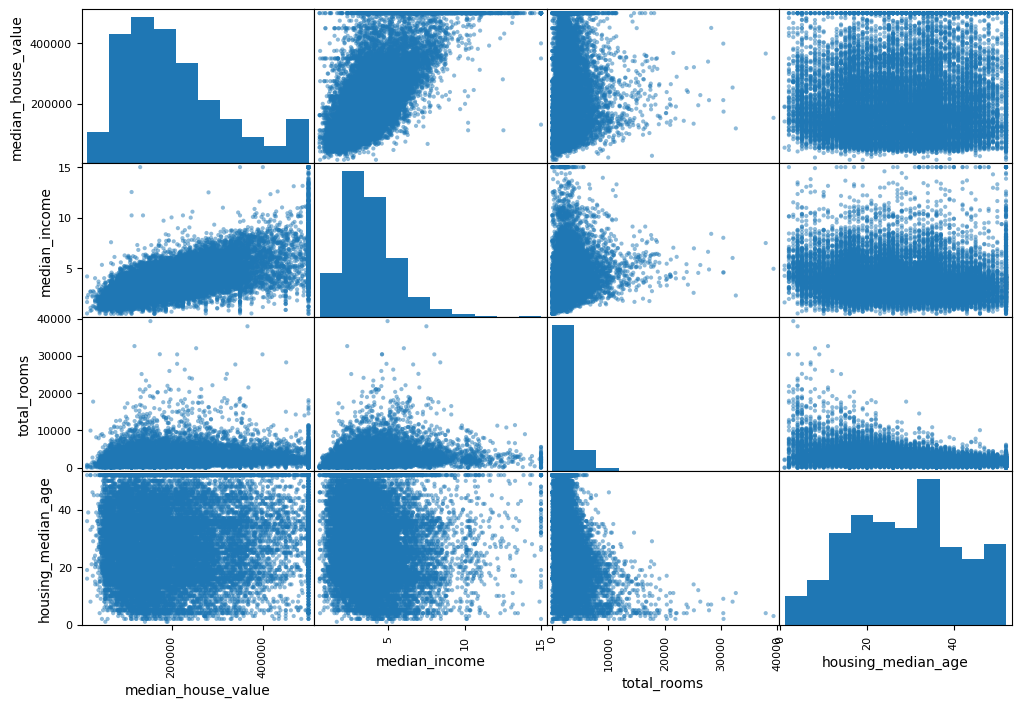

In [52]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))
#this helps us to see the relationship between the attributes. (i.e the income the more it increases the more the house value increases).

<Axes: xlabel='median_income', ylabel='median_house_value'>

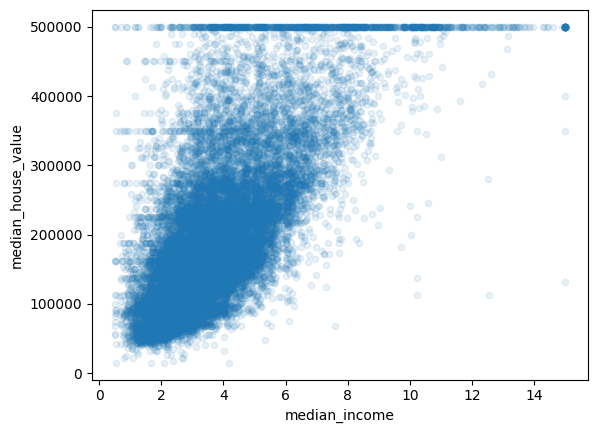

In [53]:
housing.plot(kind = 'scatter' , x='median_income', y='median_house_value' , alpha=0.1)

In [54]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,4.761658,0.231774,2.139896
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,4.931907,0.192899,2.128405
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY,4.797527,0.221327,1.788253
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,4.294118,0.260274,2.026891
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY,4.970588,0.199211,2.172269


In [55]:
#corr_matrix =housing.loc[: , 'longitude' : 'median_house_value' + "rooms_per_household" : "Population_per_household"].corr()
#corr_matrix['median_house_value'].sort_values(ascending=False)

In [56]:
#when there is messing data (many NaNs) we can drop the column or the row, if they are too much to drop we can fill the values with the mean or the median of the column/row.
#housing.dropna(subset=["total_bedrooms"]) #option 1 (drop the rows with NaNs)
#housing.drop("total_bedrooms", axis=1) #option 2     (drop the column)
median = housing["total_bedrooms"].median() #option 3
housing["total_bedrooms"].fillna(median, inplace=True)  #(fill the NaNs with the median of the column)

#I Decided to use option 3 because it is the best option to fill the missing data, because it is not a categorical data and it is not a very important data to drop the column or the row.

In [57]:
#now for the ocean_proximity column problem:
housing['ocean_proximity'].value_counts()
#since the island is only 5, we can drop it.
housing = housing[housing['ocean_proximity'] != 'ISLAND']
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
Name: count, dtype: int64

In [58]:
encoder = OneHotEncoder()
housing_1hot = encoder.fit_transform(housing[['ocean_proximity']])    #this cell basically converts the text categories to numbers, so the error we got at the corr() function is gone.

In [59]:
housing_1hot.toarray()

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

In [60]:
#we will move on to the next step now after we finished the data cleaning and preprocessing.
#3. split the data into train and test sets:
x_train, x_test, y_train, y_test = train_test_split(housing.median_income, housing.median_house_value, test_size = 0.2)

In [61]:
regression = LinearRegression()

In [62]:
regression.fit(np.array(x_train).reshape(-1,1), y_train)

LinearRegression()

In [63]:
preds = regression.predict(np.array(x_test).reshape(-1,1))

In [64]:
y_test.head()

16466    163300.0
1351      87100.0
3608     154600.0
9593     138200.0
8692     255400.0
Name: median_house_value, dtype: float64

In [65]:
preds

array([202908.87692653, 107392.27690911, 171334.41799337, ...,
       172294.63557298, 243033.4471773 , 212110.26625466])

In [66]:
residuals = preds - y_test

(array([   3.,   19.,   58.,  104.,  261.,  568., 1309., 1531.,  251.,
          23.]),
 array([-433822.93155158, -367866.80351111, -301910.67547064,
        -235954.54743017, -169998.4193897 , -104042.29134924,
         -38086.16330877,   27869.9647317 ,   93826.09277217,
         159782.22081264,  225738.34885311]),
 <BarContainer object of 10 artists>)

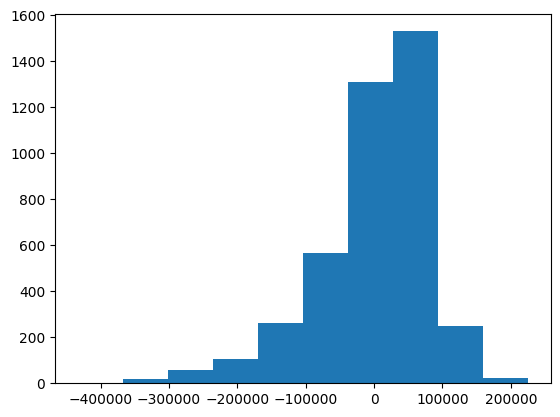

In [67]:
plt.hist(residuals)

In [68]:
mean_squared_error(y_test, preds) ** 0.5

82546.40848152076